<a href="https://colab.research.google.com/github/pstimeSU/co2emissions/blob/main/Paige_Stime_MATH2315_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Plot missing values
import missingno as msno

## Lab introduction

Use the greenhouse gas emission data set owid-co2-data.csv from Our World in Data to describe how the emission levels of the current top 10 CO2 emitters have changed over the last 50 years (1971 - 2020). 



## Import and set up the data set

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/pstimeSU/co2emissions/main/owid-co2-data%5B1%5D.csv')

In [3]:
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


##### $\rightarrow$ Use Pandas to load the file `owid-co2-data.csv` from https://github.com/owid/co2-data as a `DataFrame`. Name the `DataFrame` `df`.

##### Solution

Consult the [codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) to see the description of each column.



##### $\rightarrow$ Select the rows corresponding to individual countries 

The `country` column of the data set contains some values that are groups of countries. We will remove these observations from the data set.

In [4]:
non_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)',
                  'EU-27', 'Europe', 'Europe (excl. EU-27)', 'European Union (27) (GCP)', 'Europe (GCP)',
                  'Europe (excl. EU-28)', 'European Union (27)', 
                  'European Union (28)', 'French Equatorial Africa', 
                  'French Guiana', 'French Polynesia', 'French West Africa',
                  'High-income countries', 'International transport', 
                  'Low-income countries', 'Lower-middle-income countries', 'Mayotte', 'Middle East (GCP)',
                  'Non-OECD (GCP)',
                  'North America',  'North America (excl. USA)', 'North America (GCP)',
                  'Oceania (GCP)', 'OECD (GCP)', 
                  'Panama Canal Zone','South America', 'South America (GCP)', 'Upper-middle-income countries', 
                  'World']

Remove the rows corresponding to the non-countries.

In [5]:
Countries = df.loc[df['country'].isin(non_countries)==False]
Countries

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


## Explore the data set

##### $\rightarrow$ Display the head of the data frame

In [6]:
Countries.head(10)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,1855,AFG,3844769.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,1856,AFG,3863976.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,1857,AFG,3883276.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.113,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,1858,AFG,3902671.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.111,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,1859,AFG,3922160.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.110,NaN,NaN,NaN,NaN,NaN,NaN


##### Solution

##### $\rightarrow$ Use the `info` method further explore the data.
1.  Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?
2.  Do any of the columns have missing (null) values?

In [7]:
Countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39638 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    39638 non-null  object 
 1   year                                       39638 non-null  int64  
 2   iso_code                                   39251 non-null  object 
 3   population                                 36053 non-null  float64
 4   gdp                                        14535 non-null  float64
 5   cement_co2                                 20333 non-null  float64
 6   cement_co2_per_capita                      19018 non-null  float64
 7   co2                                        24464 non-null  float64
 8   co2_growth_abs                             23971 non-null  float64
 9   co2_growth_prct                            21484 non-null  float64
 10  co2_including_luc     

##### Solution

##### $\rightarrow$ What years are present in the data set?

In [8]:
Countries['year']

0        1850
1        1851
2        1852
3        1853
4        1854
         ... 
46518    2017
46519    2018
46520    2019
46521    2020
46522    2021
Name: year, Length: 39638, dtype: int64

The Years 1850 to 2021 are present

##### Solution

## Analysis of top emissions in 2020

##### $\rightarrow$ Find the top 10 emitters of total CO$_2$ in 2020.



In [9]:
Countries2020 = Countries.loc[Countries['year']==2020]

In [10]:
Countries2020

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
170,Afghanistan,2020,AFG,38972236.0,NaN,0.061,0.002,11.682,0.600,5.416,...,NaN,0.000,0.003,0.008,0.065,NaN,NaN,NaN,NaN,NaN
786,Aland Islands,2020,ALA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN
958,Albania,2020,ALB,2866850.0,NaN,1.048,0.366,4.729,-0.219,-4.425,...,NaN,0.000,0.002,0.002,0.029,NaN,NaN,NaN,1.047,22.143
1130,Algeria,2020,DZA,43451668.0,NaN,11.028,0.254,172.504,-7.000,-3.900,...,NaN,4.301,1.169,0.051,0.487,NaN,NaN,NaN,NaN,NaN
1302,American Samoa,2020,ASM,46216.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45561,Wallis and Futuna,2020,WLF,11679.0,NaN,0.000,0.000,0.027,0.001,5.540,...,NaN,0.000,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN
45733,Western Sahara,2020,ESH,556060.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN
46177,Yemen,2020,YEM,32284044.0,NaN,0.664,0.021,12.140,-0.544,-4.287,...,NaN,0.402,0.003,-0.038,0.084,NaN,NaN,NaN,NaN,NaN
46349,Zambia,2020,ZMB,18927716.0,NaN,0.961,0.051,7.281,-0.466,-6.022,...,NaN,0.000,0.000,1.520,0.036,NaN,NaN,NaN,0.112,1.540


In [11]:
Countries2020.sort_values(by = 'co2',ascending=False).head(10)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8989,China,2020,CHN,1.424930e+09,NaN,858.233,0.602,10956.213,215.217,2.004,...,50.362,1.256,9.103,7.270,14.544,57.893,NaN,NaN,-922.811,-8.423
44221,United States,2020,USA,3.359420e+08,NaN,40.688,0.121,4715.691,-543.453,-10.333,...,14.933,16.606,21.885,2.582,18.311,8.549,NaN,NaN,481.706,10.215
20136,India,2020,IND,1.396387e+09,NaN,122.908,0.088,2445.012,-181.447,-6.908,...,NaN,0.688,1.689,2.680,5.393,NaN,NaN,NaN,-168.131,-6.877
35053,Russia,2020,RUS,1.456173e+08,NaN,20.581,0.141,1624.221,-68.142,-4.026,...,5.754,14.456,10.333,10.591,3.403,5.517,NaN,NaN,-264.073,-16.258
21756,Japan,2020,JPN,1.252448e+08,NaN,24.490,0.196,1042.224,-63.791,-5.768,...,3.107,0.085,2.946,0.038,3.466,2.551,NaN,NaN,144.917,13.905
20552,Iran,2020,IRN,8.729019e+07,NaN,23.855,0.273,729.978,27.020,3.844,...,NaN,6.115,6.005,-0.576,1.999,NaN,NaN,NaN,-71.532,-9.799
36664,Saudi Arabia,2020,SAU,3.599711e+07,NaN,25.593,0.711,661.193,4.711,0.718,...,NaN,1.044,3.445,0.052,3.315,NaN,NaN,NaN,-3.249,-0.491
16794,Germany,2020,DEU,8.332899e+07,NaN,13.357,0.160,639.381,-67.769,-9.583,...,3.054,0.445,2.218,-0.174,2.246,2.646,NaN,NaN,130.111,20.350
20308,Indonesia,2020,IDN,2.718580e+08,NaN,28.203,0.104,609.786,-49.650,-7.529,...,NaN,0.865,0.992,25.370,1.810,NaN,NaN,NaN,14.441,2.368
39259,South Korea,2020,KOR,5.184469e+07,NaN,22.866,0.441,597.634,-48.468,-7.502,...,2.155,0.000,1.544,-0.156,1.475,3.437,NaN,NaN,61.863,10.351


##### Solution

##### $\rightarrow$ Make a histogram of total CO$_2$ emissions in 2020. Make the plot on a density scale.

Text(0.5, 0, 'Total CO2 emissions')

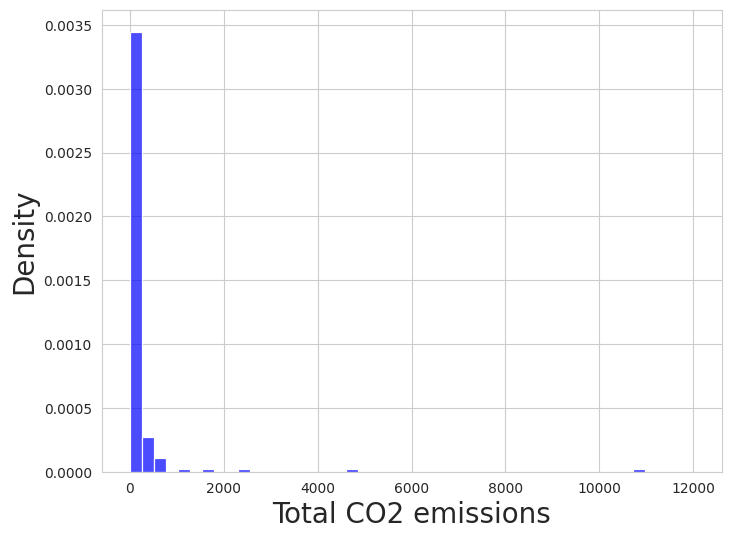

In [12]:
plt.figure(figsize=(8,6))

sns.histplot(data=Countries2020[Countries2020['year']==2020], x='co2',color='blue',alpha=0.7, bins = np.r_[np.linspace(0, 12000, 48)],stat='density')

plt.ylabel('Density',fontsize=20)
plt.xlabel('Total CO2 emissions', fontsize = 20)

##### Solution

##### $\rightarrow$ Make a boxplot of total CO$_2$ emissions in 2020. Add a strip plot on top of the boxplot.

##### Solution

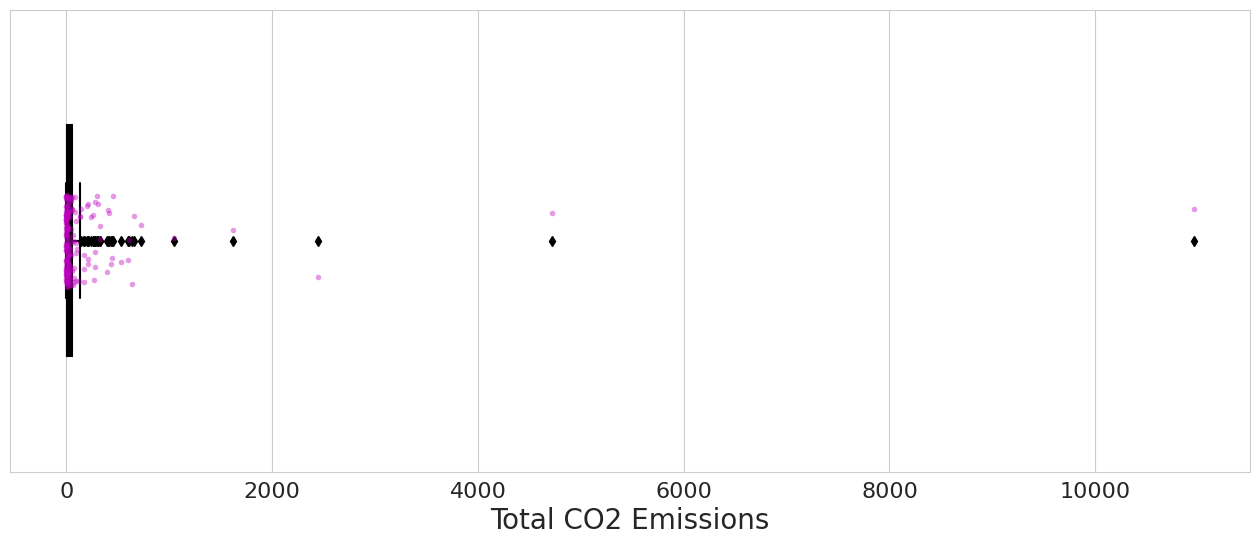

In [13]:
plt.figure(figsize=(16,6))
sns.boxplot(data=Countries2020,x='co2', color = 'k', width = 0.5)
sns.stripplot(data=Countries2020, x='co2', color='m', size=4, alpha = 0.4)
plt.xlabel('Total CO2 Emissions', fontsize=20)
plt.tick_params(labelsize=16)


Zoomed into cluster of data

(-50.0, 800.0)

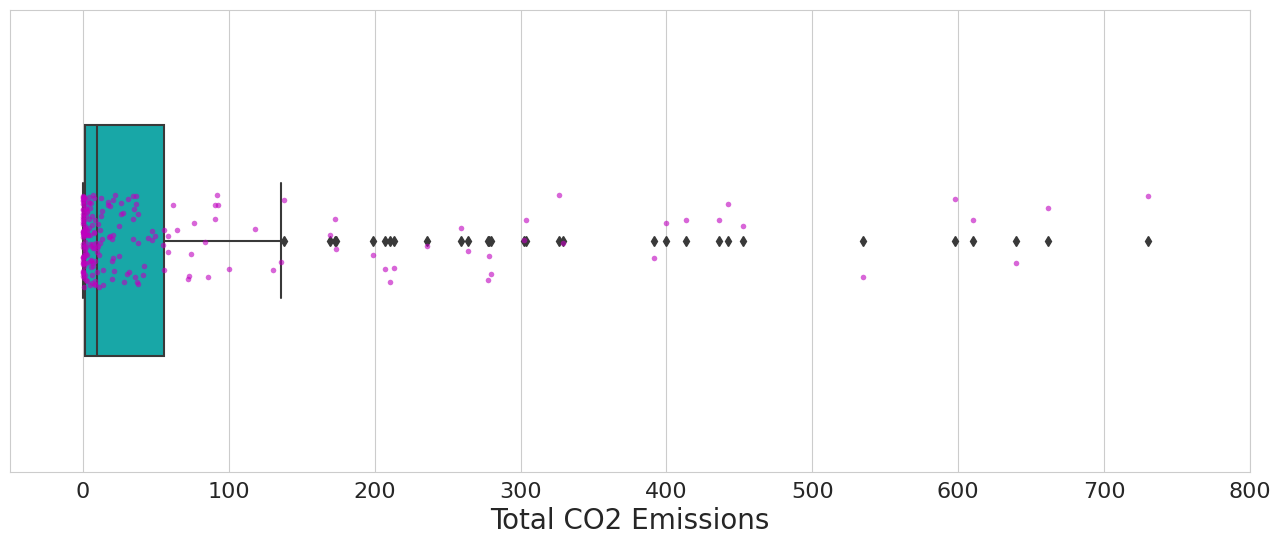

In [14]:
plt.figure(figsize=(16,6))
sns.boxplot(data=Countries2020,x='co2', color = 'c', width = 0.5)
sns.stripplot(data=Countries2020, x='co2', color='m', size=4, alpha = 0.6)
plt.xlabel('Total CO2 Emissions', fontsize=20)
plt.tick_params(labelsize=16)
plt.xlim(-50,800)

(-10.0, 140.0)

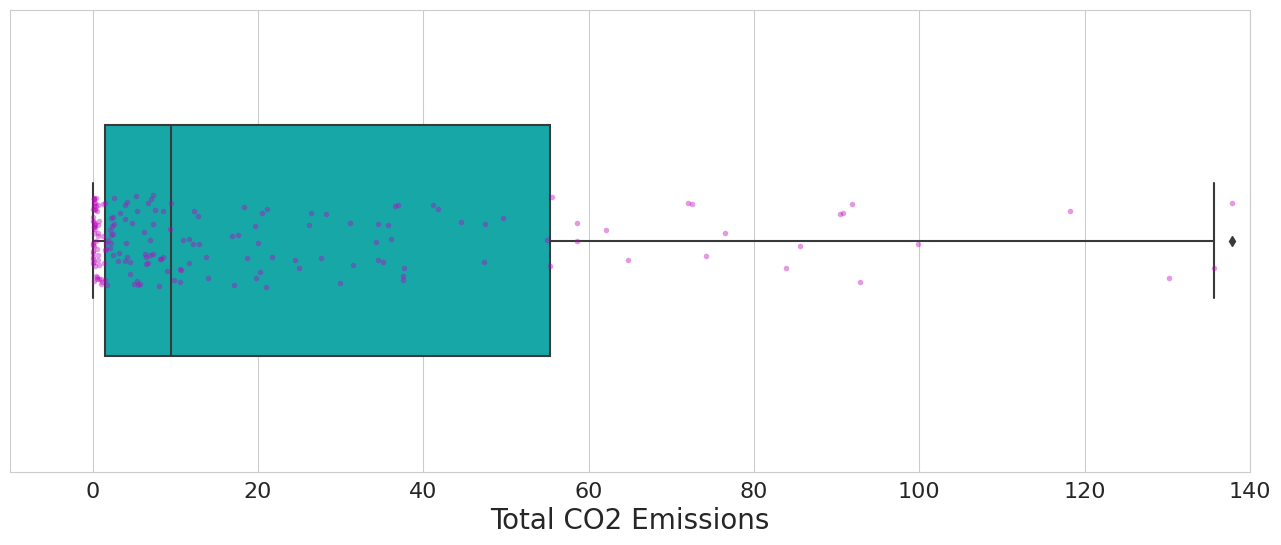

In [15]:
plt.figure(figsize=(16,6))
sns.boxplot(data=Countries2020,x='co2', color = 'c', width = 0.5)
sns.stripplot(data=Countries2020, x='co2', color='m', size=4, alpha = 0.4)
plt.xlabel('Total CO2 Emissions', fontsize=20)
plt.tick_params(labelsize=16)
plt.xlim(-10,140)

##### $\rightarrow$ Are the CO$_2$ emissions of the top 10 emitters in 2020 outliers in the distribution?

Yes

##### Solution

## Emission trend over time

##### $\rightarrow$ Is the data set missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020?

In [16]:
top10=['China', 'United States', 'India', 'Russia', 'Japan', 'Iran', 'Saudi Arabia', 'Germany', 'Indonesia', 'South Korea']
topten2020=Countries.loc[Countries['country'].isin(top10),['year','country', 'co2']]
topten2020

,year,country,co2
8819,1850,China,NaN
8820,1851,China,NaN
8821,1852,China,NaN
8822,1853,China,NaN
8823,1854,China,NaN
...,...,...,...
44218,2017,United States,5210.958
44219,2018,United States,5376.657
44220,2019,United States,5259.144
44221,2020,United States,4715.691


##### Solution

Some data is missing

##### $\rightarrow$ Plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020.

(1970.0, 2021.0)

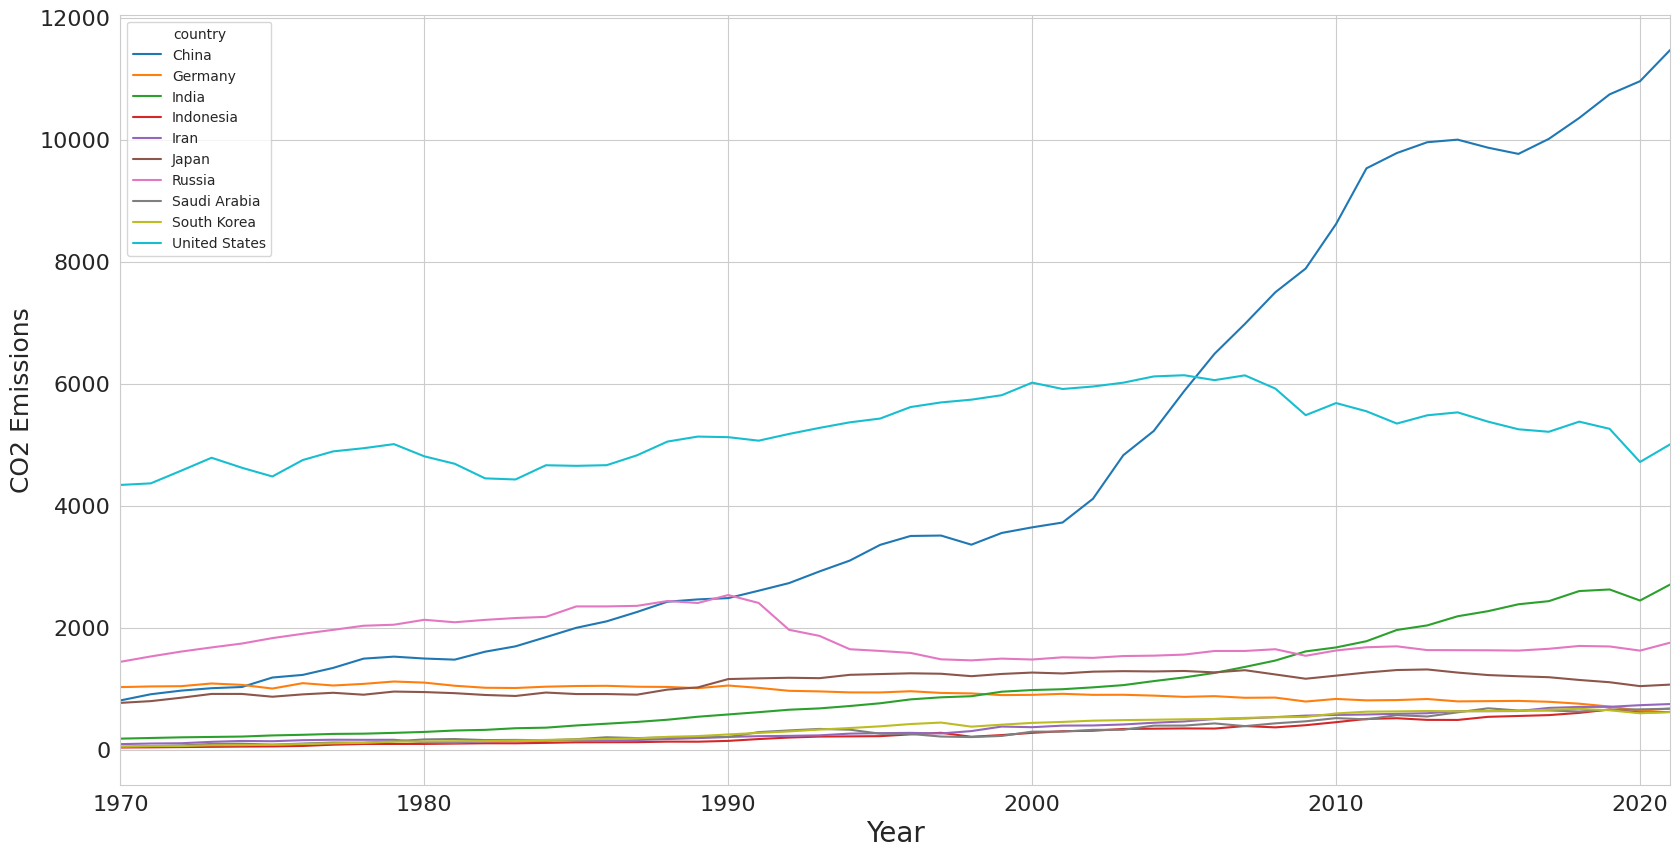

In [17]:
plt.figure(figsize=(20,10))
sns.lineplot(data=topten2020, x='year', y='co2', hue='country')
plt.xlabel('Year', fontsize=20)
plt.ylabel('CO2 Emissions', fontsize=18)
plt.tick_params(labelsize=16)
plt.xlim(1970, 2021)

##### Solution

##### $\rightarrow$ Again, plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020, but now also include a plot of the mean total CO$_2$ emissions over all countries on the same plot.

The mean is shown in black

<ipython-input-41-4277a6f89fa1>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average = topten2020.groupby('year').mean()


<Axes: xlabel='Year', ylabel='CO2 Emissions'>

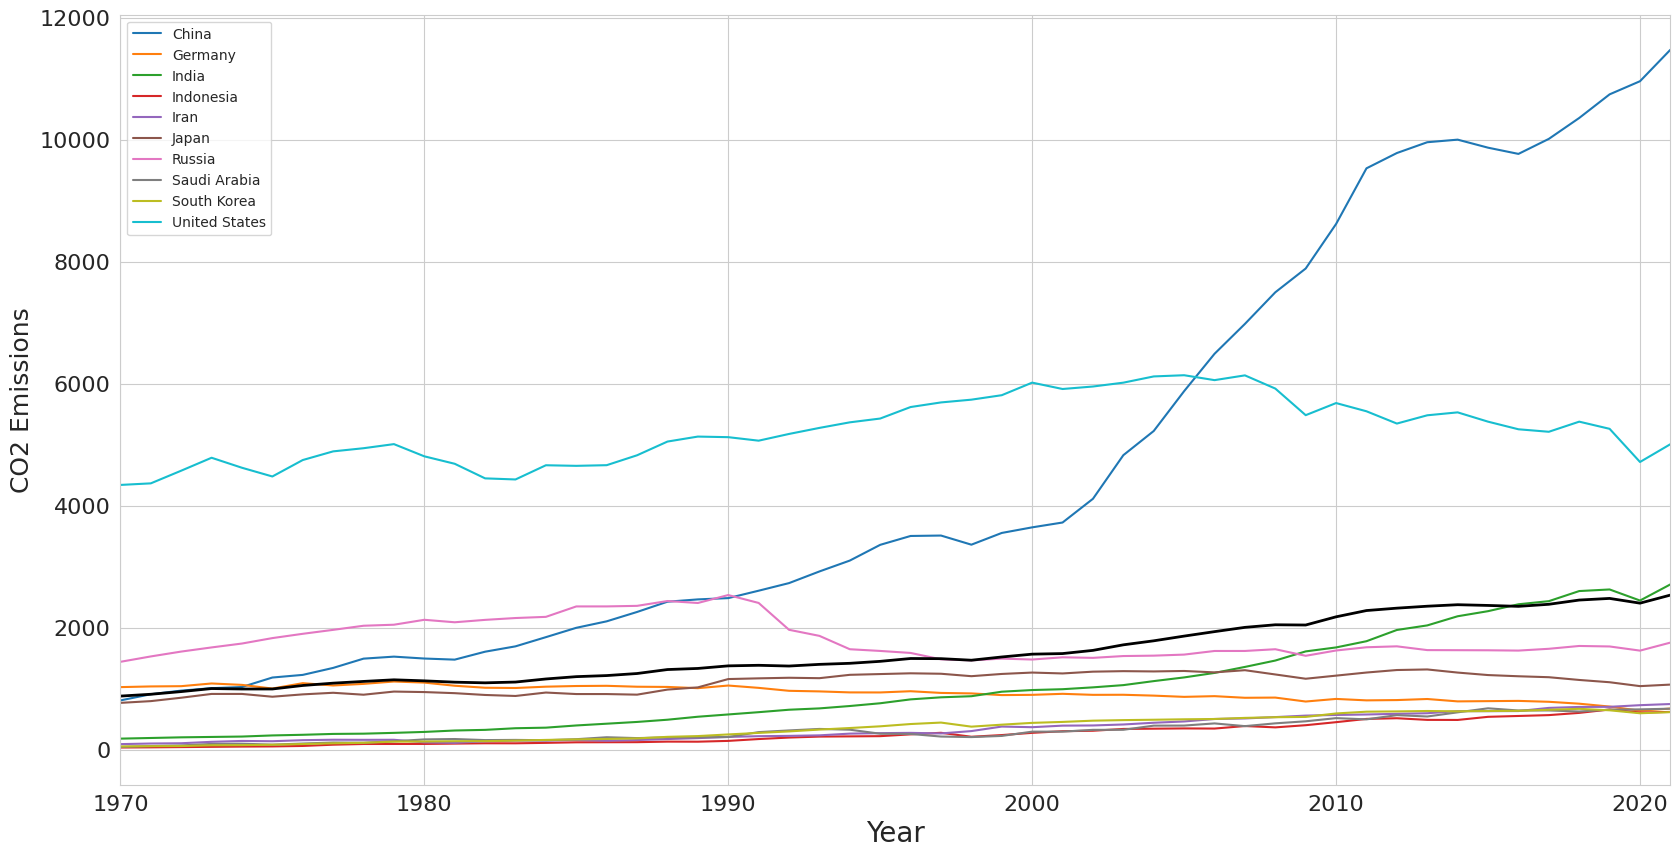

In [41]:
plt.figure(figsize=(20,10))
sns.lineplot(data=topten2020, x='year', y='co2', hue='country')
plt.xlabel('Year', fontsize=20)
plt.ylabel('CO2 Emissions', fontsize=18)
plt.tick_params(labelsize=16)
plt.xlim(1970, 2021)
topten2020.dropna
average = topten2020.groupby('year').mean()
sns.lineplot(data=average, x='year', y='co2', color='k', linewidth=2)

##### Solution

##### $\rightarrow$ Given the large difference between the smallest and largest values, it can help to plot the results on a log scale. Produce the plot of the top 10 emitters and the mean with CO$_2$ emissions on a log scale.

<ipython-input-49-a23e0db3ae51>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average = topten2020.groupby('year').mean()


<Axes: xlabel='Year', ylabel='CO2 Emissions'>

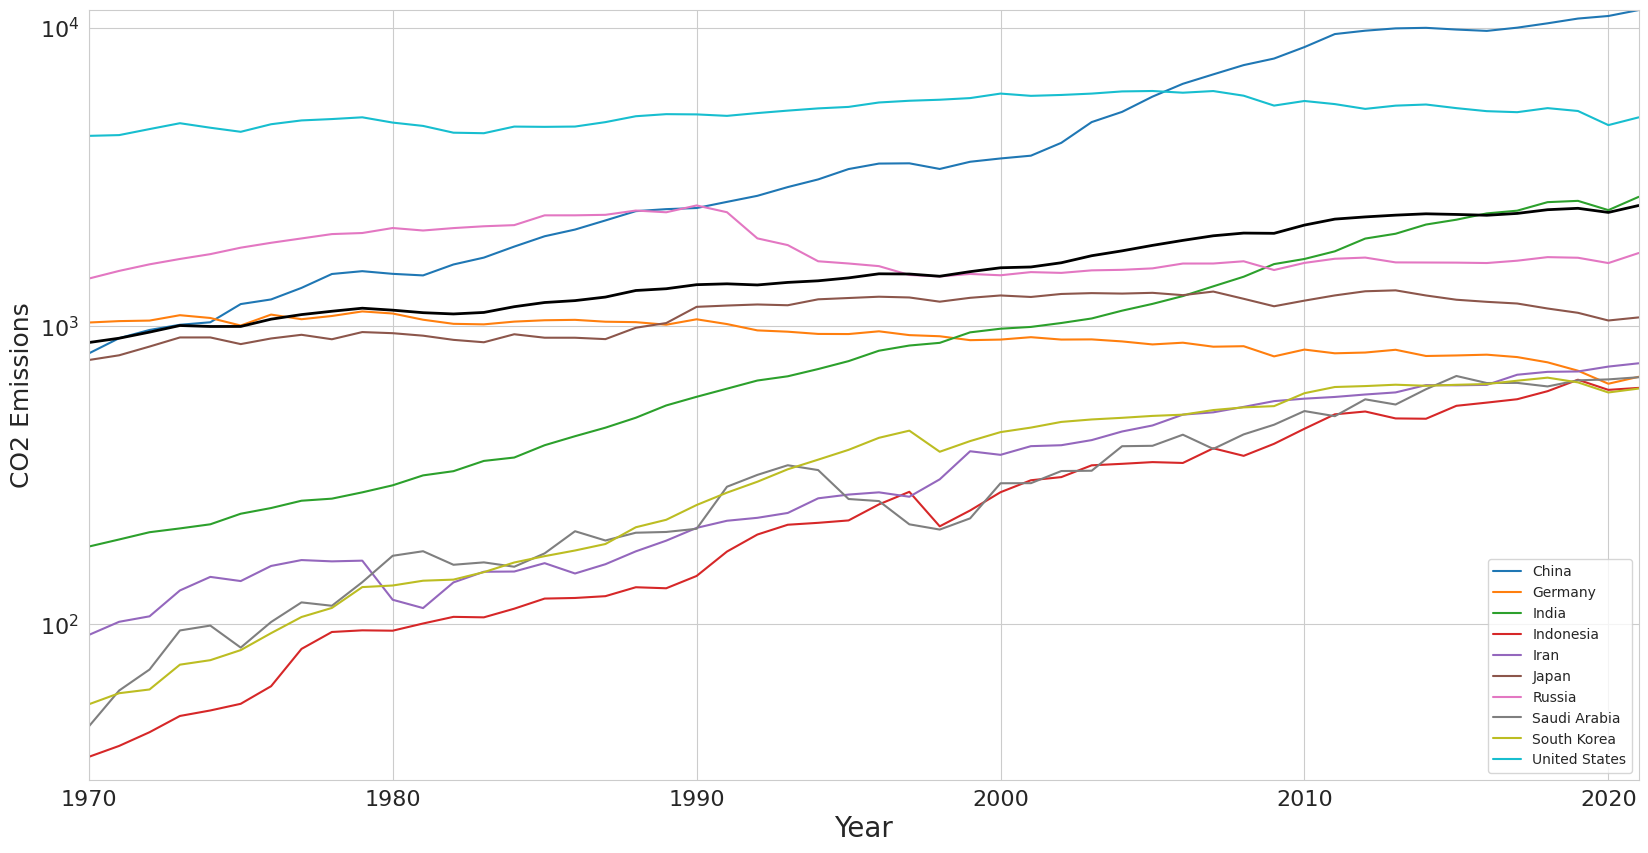

In [49]:
plt.figure(figsize=(20,10))
sns.lineplot(data=topten2020, x='year', y='co2', hue='country')
plt.xlabel('Year', fontsize=20)
plt.ylabel('CO2 Emissions', fontsize=18)
plt.tick_params(labelsize=16)
plt.xlim(1970, 2021)
plt.yscale("log")
plt.ylim(30,11500)
topten2020.dropna
average = topten2020.groupby('year').mean()
sns.lineplot(data=average, x='year', y='co2', color='k', linewidth=2)

##### Solution

##### $\rightarrow$ Comment on the trend in CO$_2$ emissions from these countries over the last 50 years.

CO2 Emissions from the countries which emitted the most in 2020 have, for the most part, climbed since 1970. China's emissions have risen the most sharply, and Russia's has dipped since its peak, however the average of the emissions from each country per year has steadily risen. 

##### Solution